In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-01/bank.csv
/kaggle/input/bank-full-version1/bank-full.csv


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import collections
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import warnings

#importing packages for modeling
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
Bank_data = pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [27]:
import pandas as pd

# Load your CSV file
Bank_data = pd.read_csv('/kaggle/input/bank-full-version1/bank-full.csv')

# Display column names
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
Bank_data.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sl. no     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


# Data Cleaning

# Handle Duplicates

# Remove duplicates


In [82]:
Bank_data = Bank_data.drop_duplicates()
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Handle missing values

In [83]:
# Check for missing values in all datasets
print(Bank_data.isnull().sum())

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Exploratory Data Analysis (EDA)

In [24]:
# importing the external libraries
import pandas as pd

# importing the data
Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [86]:
new_bank_data = Bank_data.sort_values(by='balance', ascending=True)

In [11]:
print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


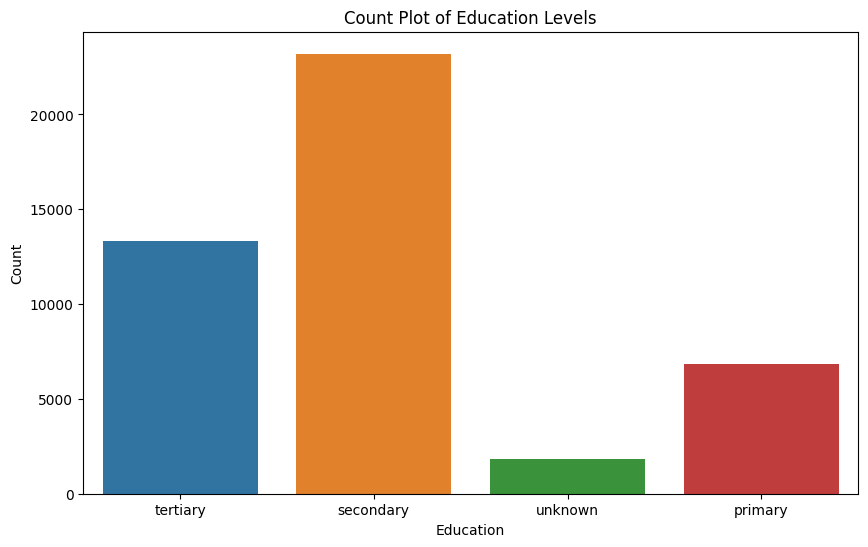

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Bank_data is already defined
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=Bank_data)
plt.title('Count Plot of Education Levels')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


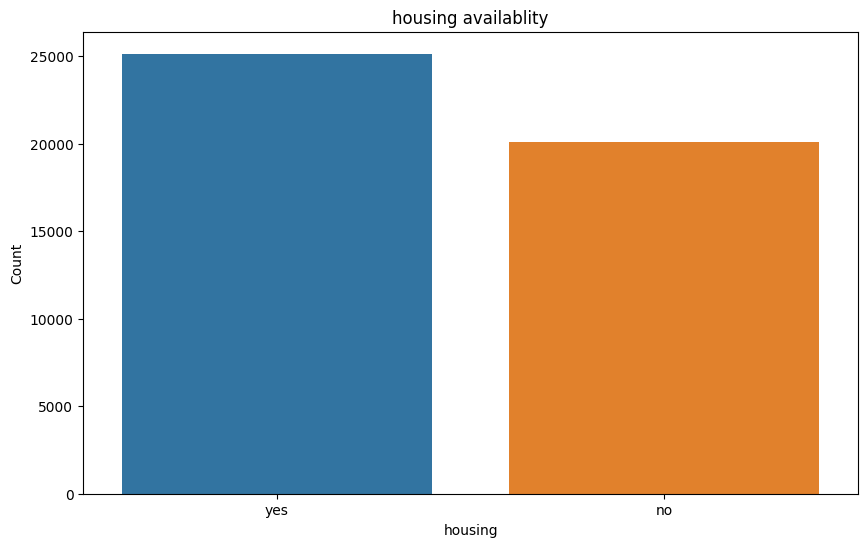

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Bank_data is already defined
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', data=Bank_data)
plt.title('housing availablity')
plt.xlabel('housing')
plt.ylabel('Count')
plt.show()


In [22]:
import plotly.express as px

# Bar plot for education levels
bar_plot = px.bar(Bank_data, x='education', y='education', title="Distribution of Education Levels", labels={'education':'Count'})
bar_plot.show()


In [21]:
import plotly.express as px

# Assuming Bank_data is already defined
outliers = px.box(Bank_data, y="pdays")

# Show the plot
outliers.show()


In [87]:
#Outlier Detection and Handling:
#Identify and remove outliers in the 'balance' column:
Q1 = new_bank_data['balance'].quantile(0.25)
Q3 = new_bank_data['balance'].quantile(0.75)
IQR= Q3-Q1

print(Q1)
print(Q3)
print(IQR)

72.0
1428.0
1356.0


In [88]:
Bank_data1=Bank_data[ ~((Bank_data['balance']<(Q1-1.5*IQR))|(Bank_data['balance']>(Q3+1.5*IQR)))] 
print(Bank_data1)

       sl. no  age           job   marital  education default  balance  \
0           1   58    management   married   tertiary      no     2143   
1           2   44    technician    single  secondary      no       29   
2           3   33  entrepreneur   married  secondary      no        2   
3           4   47   blue-collar   married    unknown      no     1506   
4           5   33       unknown    single    unknown      no        1   
...       ...  ...           ...       ...        ...     ...      ...   
45205   45206   25    technician    single  secondary      no      505   
45206   45207   51    technician   married   tertiary      no      825   
45207   45208   71       retired  divorced    primary      no     1729   
45209   45210   57   blue-collar   married  secondary      no      668   
45210   45211   37  entrepreneur   married  secondary      no     2971   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no    unknown 

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

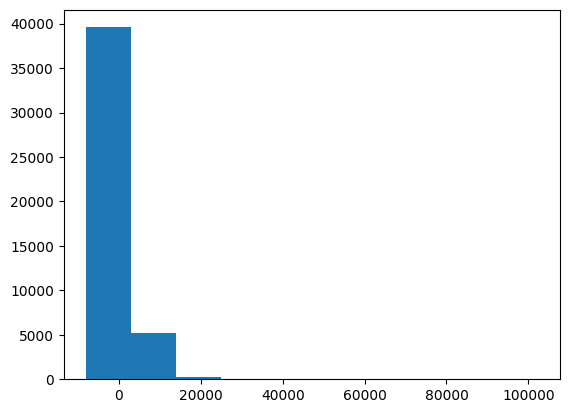

In [89]:
# Histogram
import matplotlib.pyplot as plt
plt.hist(new_bank_data['balance'])

In [90]:
# importing the external libraries
import pandas as pd

# importing the data
Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [91]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [92]:
#Handling Missing Data: Remove columns that have more than 50% missing values: 
Bank_data.dropna(axis=1,thresh=0.5)

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [93]:
import pandas as pd
Bank_data4 = Bank_data['balance'].interpolate()
print(Bank_data4)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


In [94]:
import pandas as pd
Bank_data5=Bank_data4['balance'] = Bank_data['balance'].interpolate(method='linear')
print(Bank_data5)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

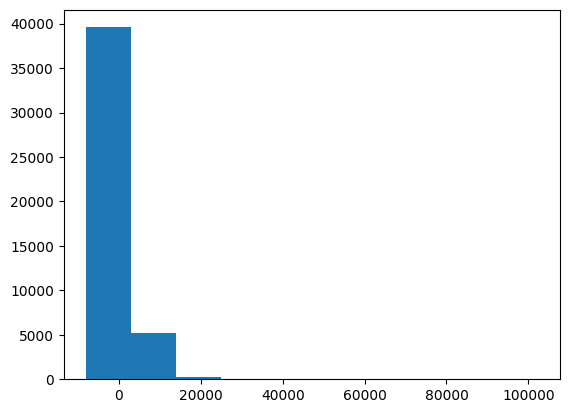

In [102]:
# Histogram
import matplotlib.pyplot as plt
plt.hist(Bank_data['balance'])

In [96]:
# importing the external libraries
import pandas as pd

# importing the data
Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [103]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
Bank_data.columns

In [ ]:
Bank_data.values

In [ ]:
Bank_data.dtypes

In [ ]:
Bank_data.describe()

In [ ]:
Bank_data.nunique()

In [ ]:
Bank_data.hist(bins=60, figsize=(30,20))

In [ ]:
prev_zeroac = Bank_data[Bank_data['previous'] == 0]

In [ ]:
prev_zeroac['poutcome'].unique()

In [ ]:
prev_oneac = Bank_data[Bank_data['previous'] > 0]

In [ ]:
prev_oneac['poutcome'].unique()

In [ ]:

Bank_Datafr = Bank_data.loc[(Bank_data['housing'] == 'no') & (Bank_data['loan'] == 'no') & (Bank_data['contact'] == 'telephone')]

In [ ]:
Bank_Datafr

In [ ]:
Bank_Datafr['default'].unique()

In [ ]:
# importing the external libraries
import pandas as pd

# importing the data
Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [ ]:
Bank_data

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


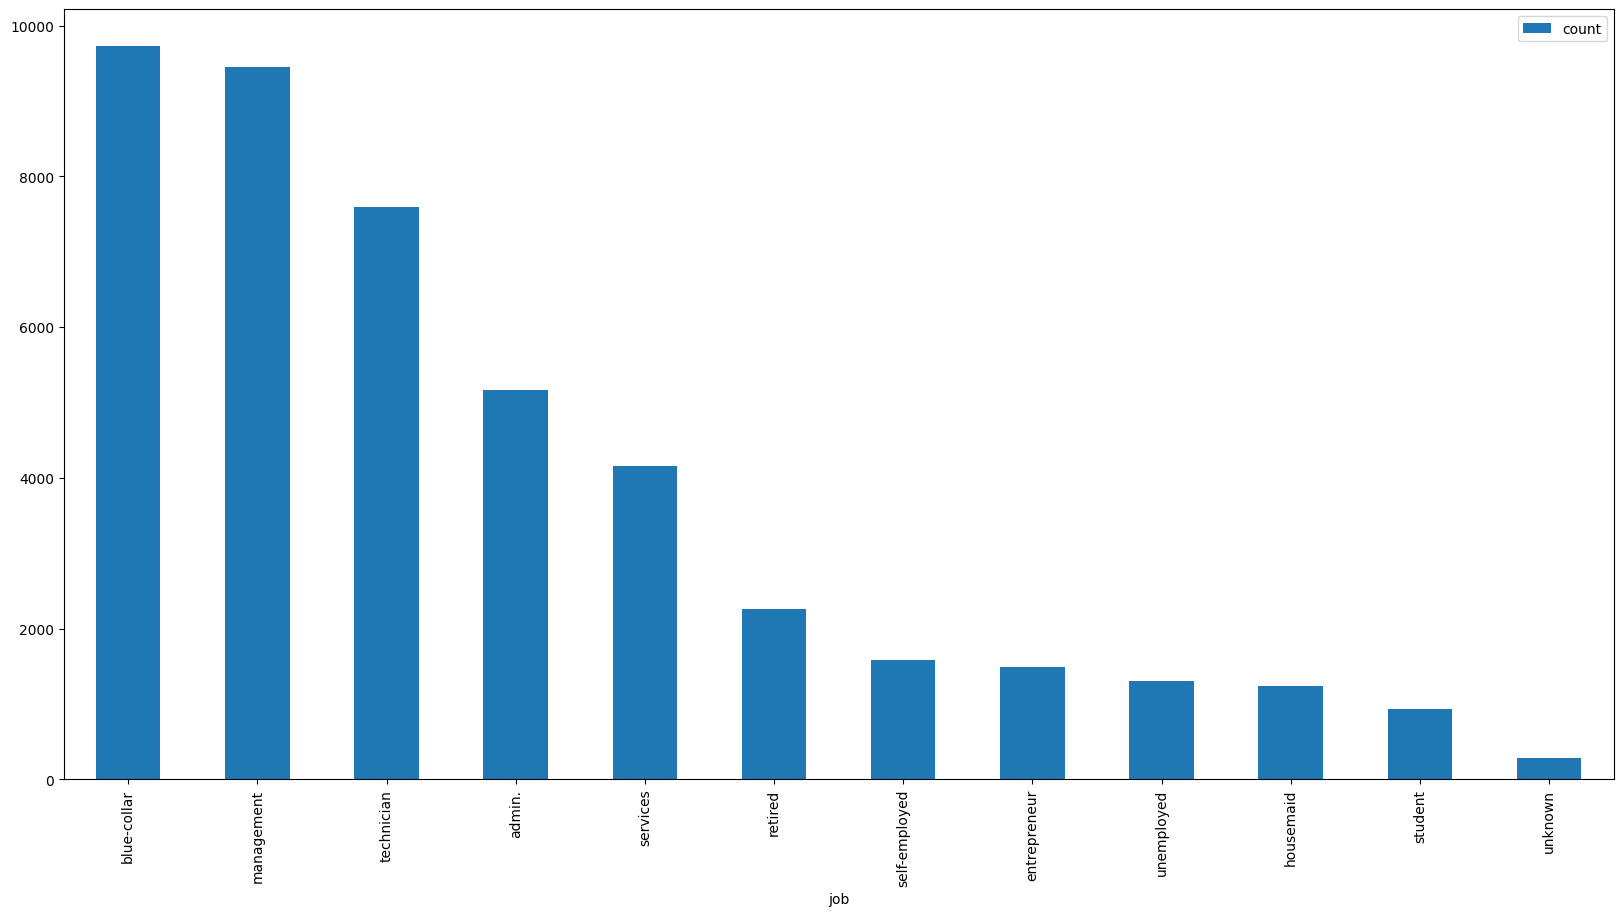

In [104]:
pd.DataFrame(Bank_data['job'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(Bank_data['job'].value_counts())

,count
marital,
married,27214
single,12790
divorced,5207


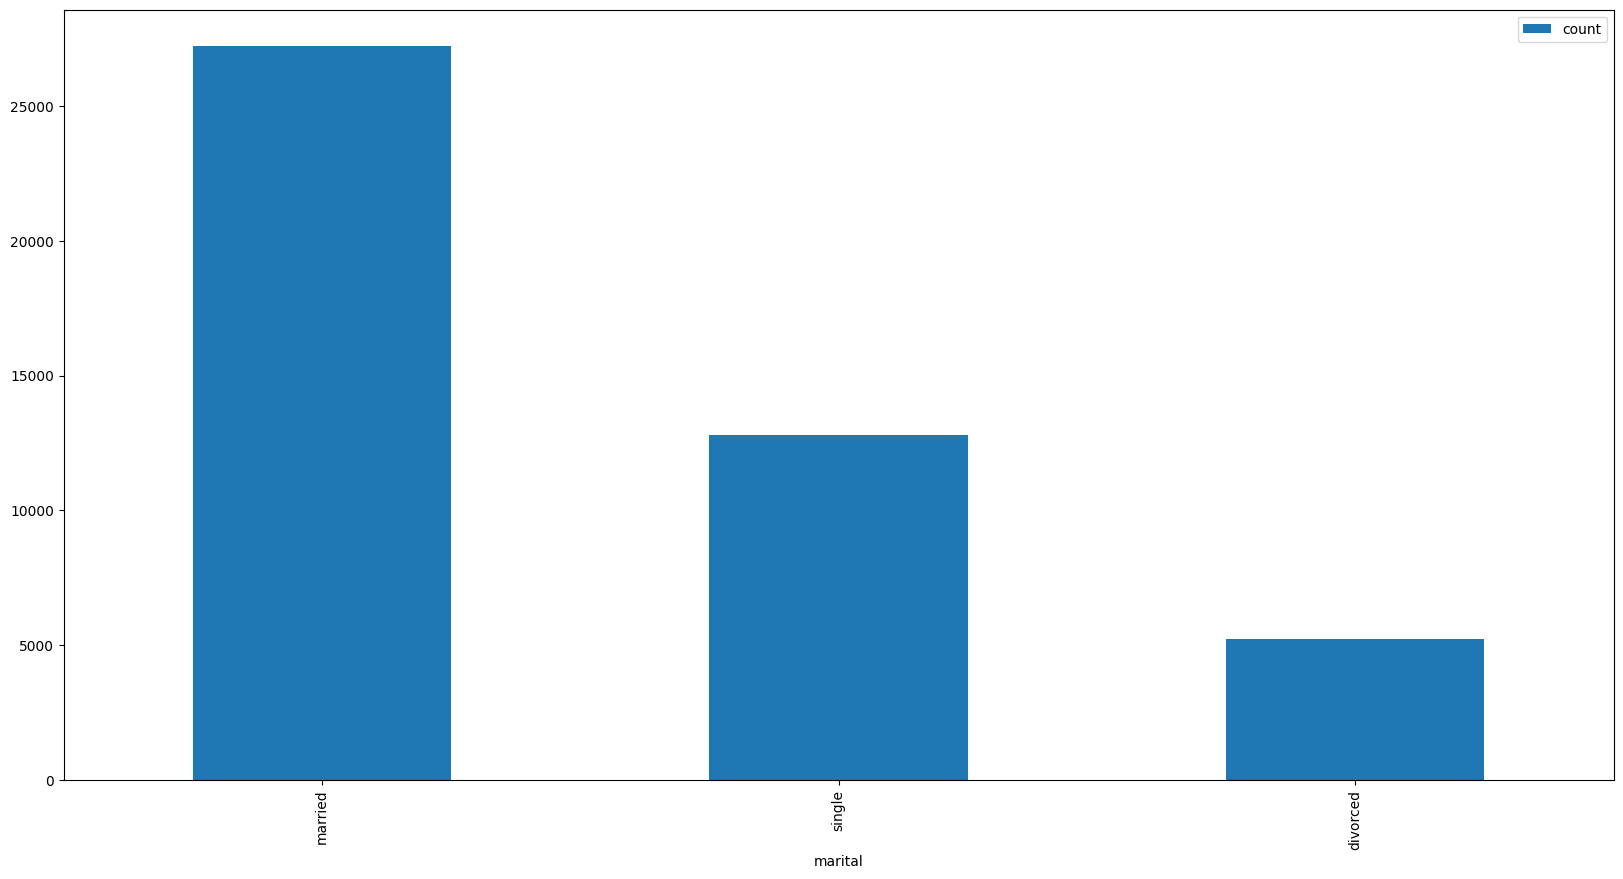

In [105]:
pd.DataFrame(Bank_data['marital'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(Bank_data['marital'].value_counts())

In [ ]:
newdataframe = Bank_data

In [ ]:
newdataframe['default'] = newdataframe['default'].replace('unknown', np.nan)


In [ ]:
newdataframe['loan'] = newdataframe['loan'].replace('unknown', np.nan)

In [ ]:
newdataframe['housing'] = newdataframe['housing'].replace('unknown', np.nan)

In [ ]:
newdataframe['education'] = newdataframe['education'].replace('unknown', np.nan)

In [ ]:
newdataframe['job'] = newdataframe['job'].replace('unknown', np.nan)

In [ ]:
newdataframe['marital'] = newdataframe['marital'].replace('unknown', np.nan)

In [ ]:
newdataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming newdataframe is already defined
pd.DataFrame(newdataframe['education'].value_counts()).plot(kind='bar', figsize=(20, 10))

# Display the plot
plt.show()


In [ ]:
newdataframe.isna().sum()

In [ ]:
newdataframe = nan_bank_df.sort_values(by='age', ascending=True)

In [ ]:
newdataframe

In [ ]:
newdataframe['job'].unique()

In [106]:
data_marital = pd.DataFrame()

data_marital['student'] = newdataframe[newdataframe['job'] == 'student']['marital'].value_counts()
data_marital['blue-collar'] = newdataframe[newdataframe['job'] == 'blue-collar']['marital'].value_counts()
data_marital['admin.'] = newdataframe[newdataframe['job'] == 'admin.']['marital'].value_counts()
data_marital['services'] = newdataframe[newdataframe['job'] == 'services']['marital'].value_counts()
data_marital['unemployed'] = newdataframe[newdataframe['job'] == 'unemployed']['marital'].value_counts()
data_marital['technician'] = newdataframe[newdataframe['job'] == 'technician']['marital'].value_counts()
data_marital['retired'] = newdataframe[newdataframe['job'] == 'retired']['marital'].value_counts()
data_marital['management'] = newdataframe[newdataframe['job'] == 'management']['marital'].value_counts()
data_marital['entrepreneur'] = newdataframe[newdataframe['job'] == 'entrepreneur']['marital'].value_counts()
data_marital['self-employed'] = newdataframe[newdataframe['job'] == 'self-employed']['marital'].value_counts()
data_marital['housemaid'] = newdataframe[newdataframe['job'] == 'housemaid']['marital'].value_counts()
data_marital['retired'] = newdataframe[newdataframe['job'] == 'retired']['marital'].value_counts()
data_marital['nan'] = newdataframe[newdataframe['job'] == 'nan']['marital'].value_counts()

In [ ]:
data_marital

In [ ]:
newdataframe['marital'].unique()

In [107]:
import pandas as pd


agetomarital = pd.DataFrame()
agetomarital['married'] = newdataframe[newdataframe['marital'] == 'married']['age'].value_counts()
agetomarital['single'] = newdataframe[newdataframe['marital'] == 'single']['age'].value_counts()
agetomarital['divorced'] = newdataframe[newdataframe['marital'] == 'divorced']['age'].value_counts()

print(agetomarital)


     married  single  divorced
age                           
34      1131   650.0     149.0
35      1077   631.0     186.0
36      1076   538.0     192.0
33      1075   746.0     151.0
37      1073   453.0     170.0
..       ...     ...       ...
89         2     NaN       1.0
92         2     NaN       NaN
93         2     NaN       NaN
88         2     NaN       NaN
95         1     NaN       1.0

[73 rows x 3 columns]


In [ ]:
agetomarital.sort_index()

In [ ]:
newdataframe['education'].unique()

In [108]:
import pandas as pd


agetoeducation = pd.DataFrame()
agetoeducation['tertiary'] = newdataframe[newdataframe['education'] == 'tertiary']['age'].value_counts()
agetoeducation['secondary'] = newdataframe[newdataframe['education'] == 'secondary']['age'].value_counts()
agetoeducation['unknown'] = newdataframe[newdataframe['education'] == 'unknown']['age'].value_counts()
agetoeducation['primary'] = newdataframe[newdataframe['education'] == 'primary']['age'].value_counts()

print(agetoeducation)

     tertiary  secondary  unknown  primary
age                                       
32        776     1088.0     42.0      179
33        760     1011.0     34.0      167
31        749     1065.0     43.0      139
34        718     1000.0     46.0      166
30        686      913.0     34.0      124
..        ...        ...      ...      ...
82          2        3.0      2.0       12
81          2        3.0      2.0       10
80          1       12.0      1.0       17
89          1        NaN      NaN        2
84          1        3.0      NaN        5

[65 rows x 4 columns]


In [ ]:
agetoeducation.sort_index()

In [ ]:
print(data_marital.columns)


<Axes: title={'center': 'Age VS Education'}, xlabel='age'>

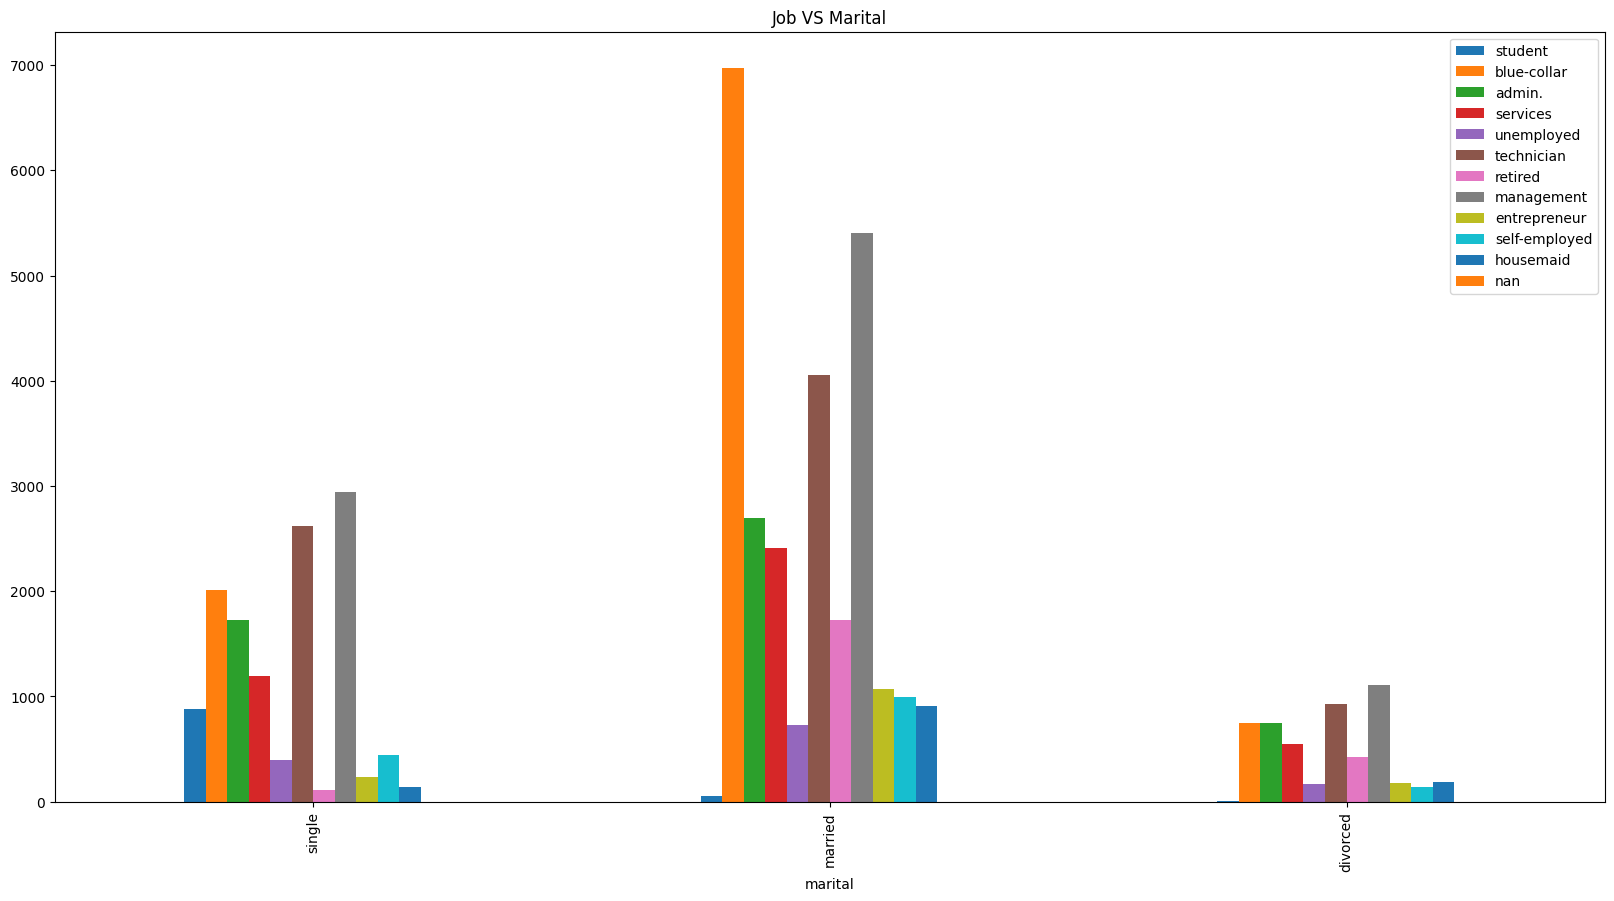

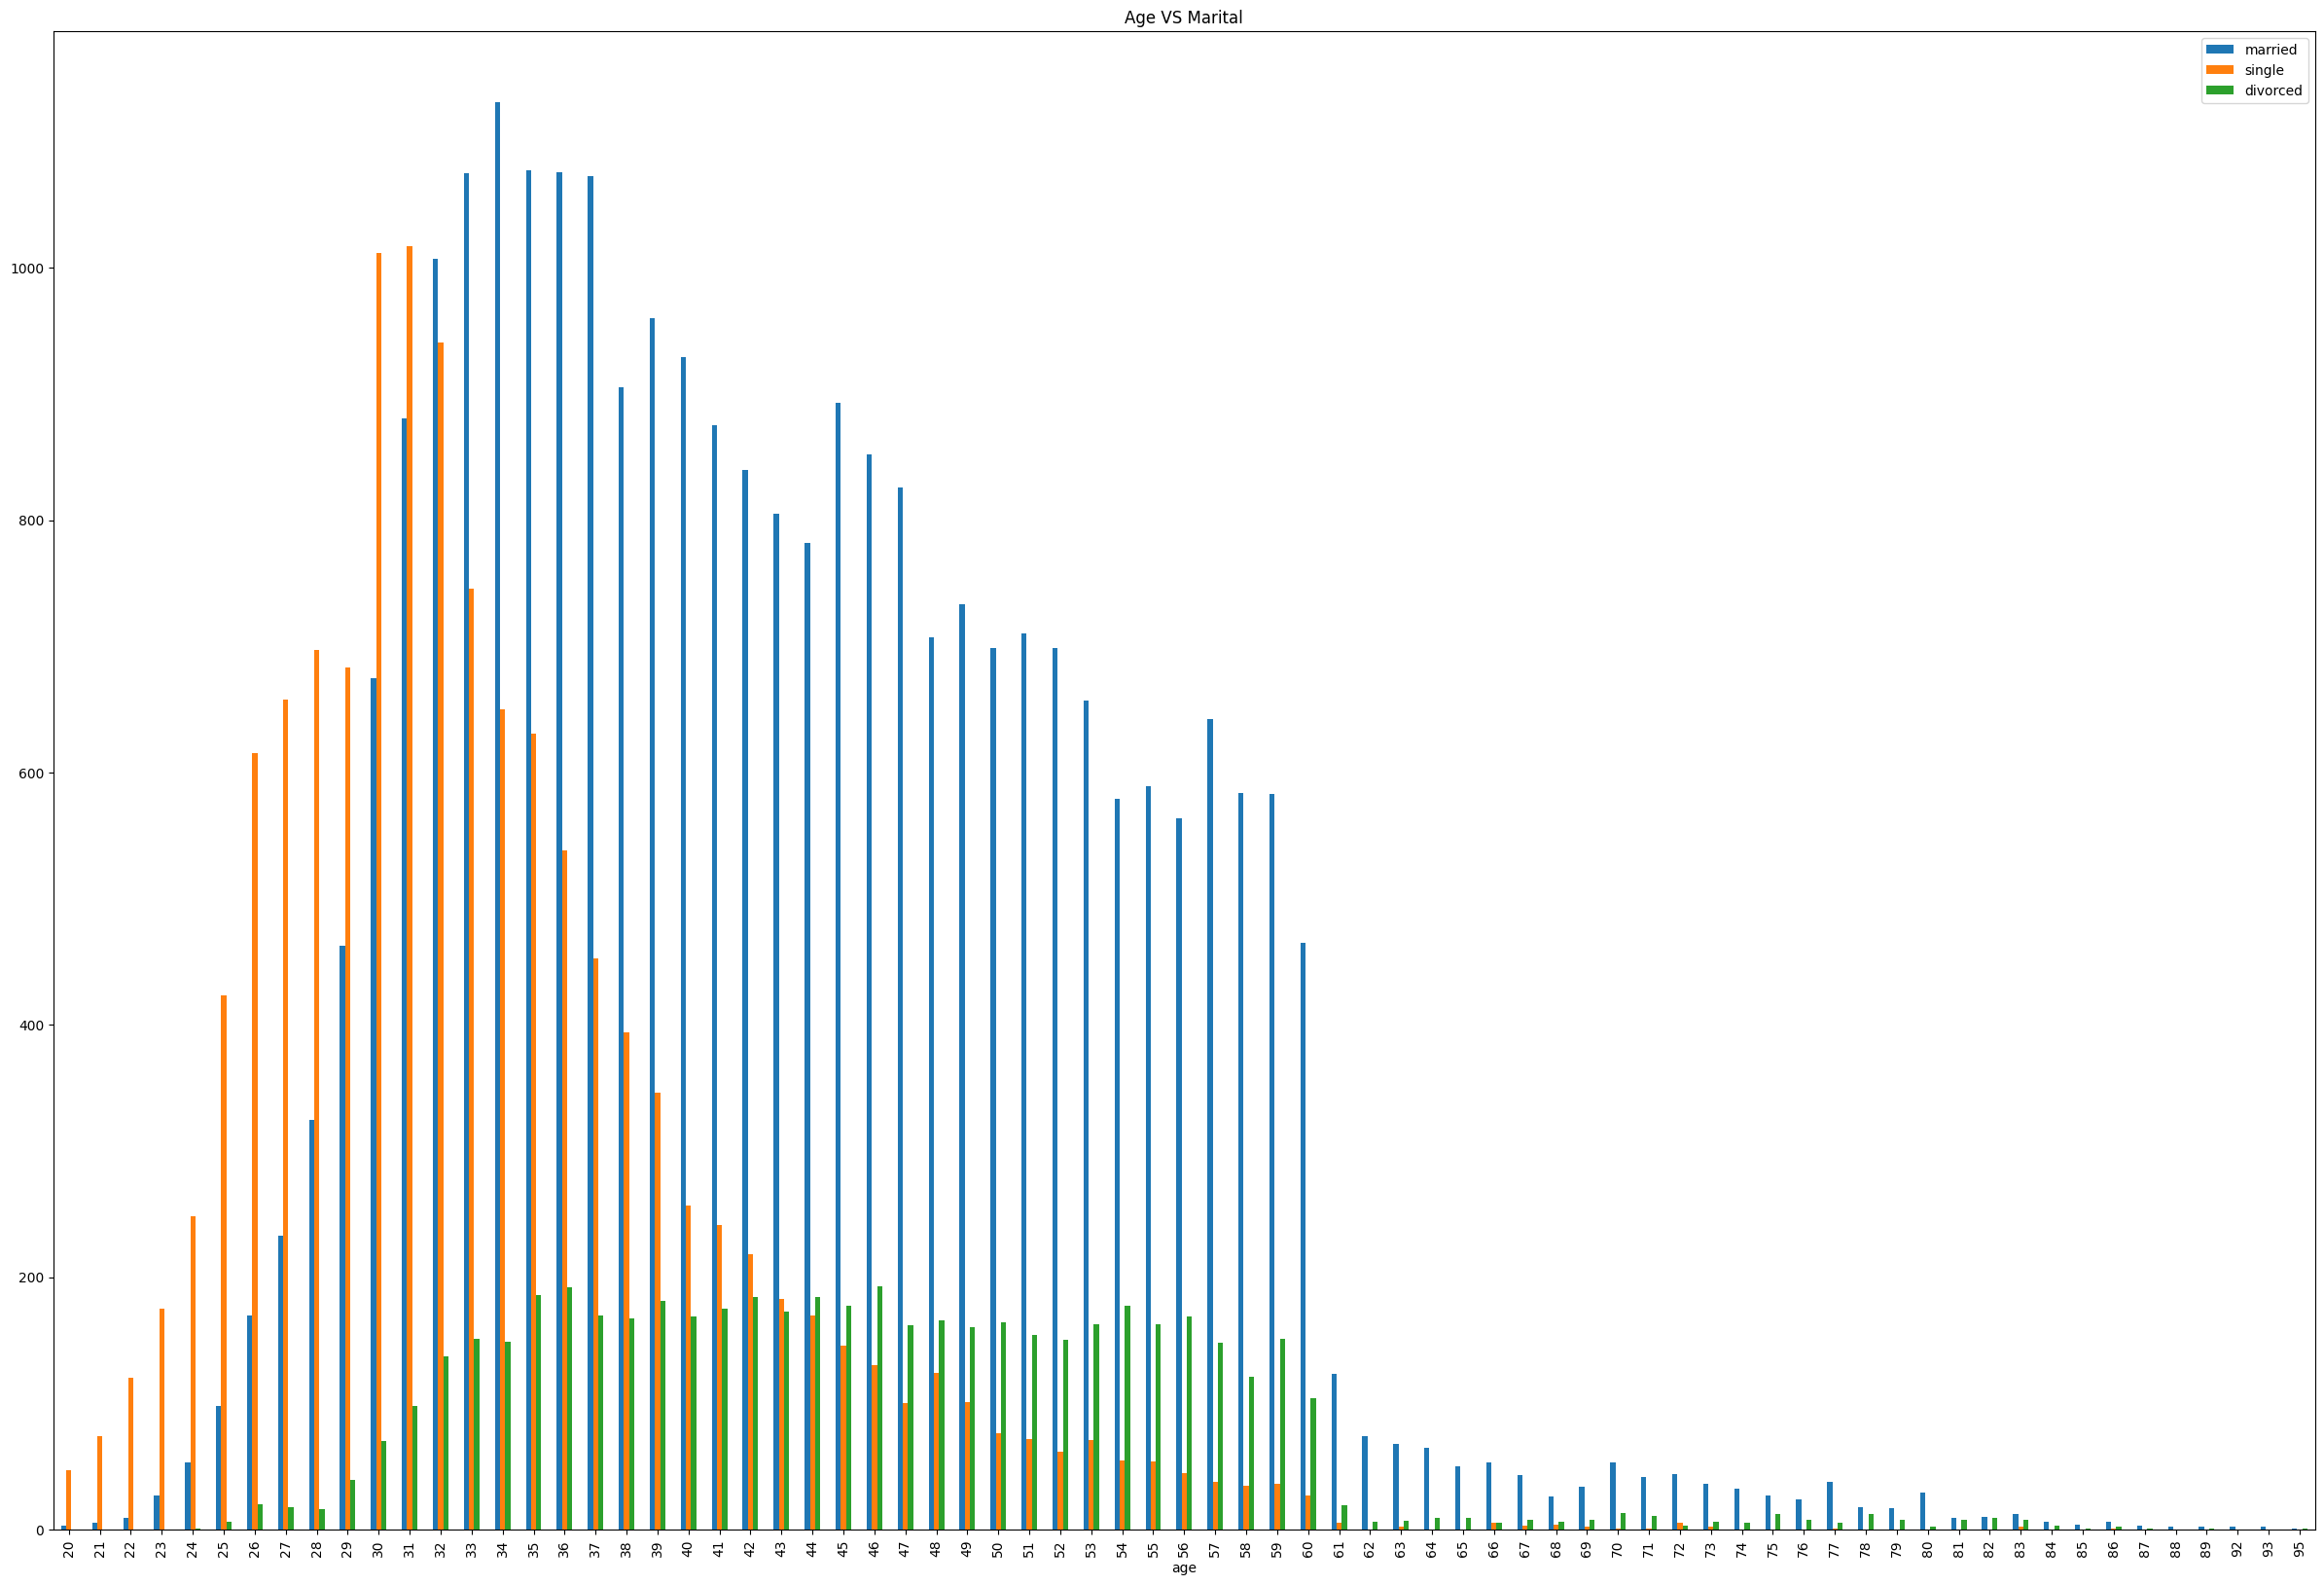

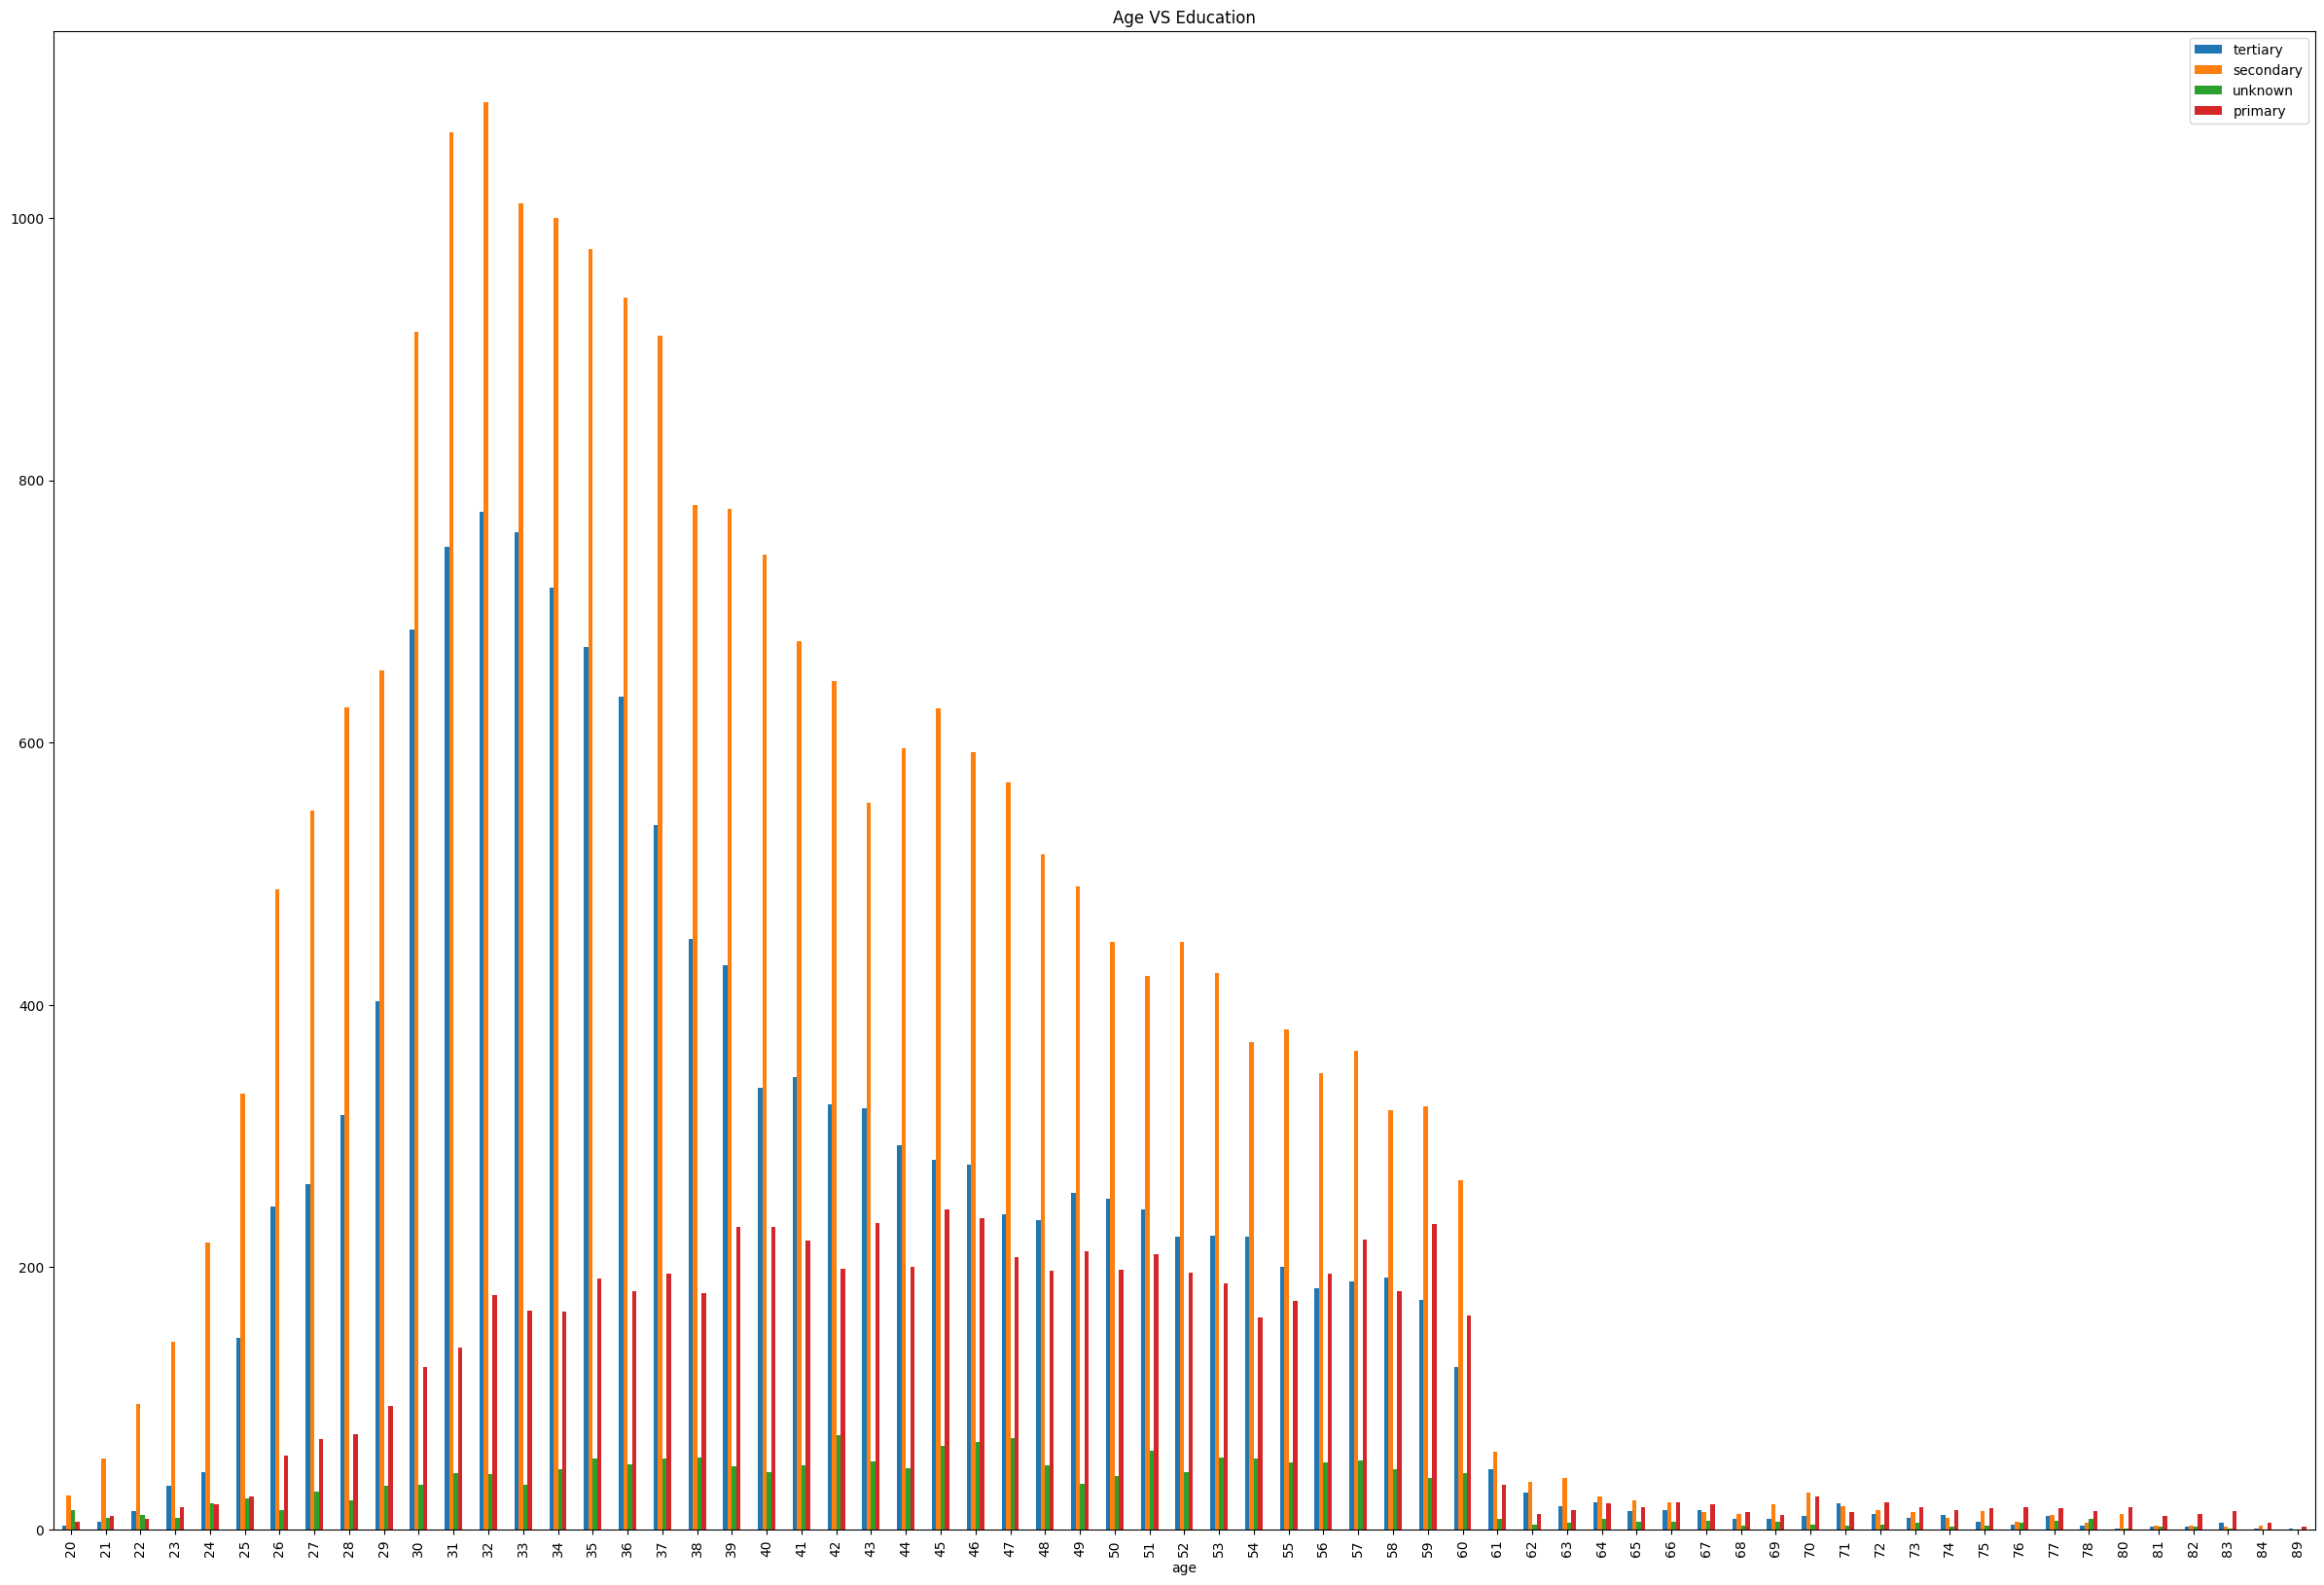

In [111]:
data_marital.plot.bar(title = "Job VS Marital", figsize=(20,10))
agetomarital.sort_index().plot.bar(title = 'Age VS Marital', figsize = (30,20))
agetoeducation.sort_index().plot.bar(title = 'Age VS Education', figsize = (30,20))

In [ ]:
newdataframe

In [112]:
import pandas as pd


agetodeposit = pd.DataFrame()
agetodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['age'].value_counts()
agetodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['age'].value_counts()

print(agetodeposit)

     yes      no
age             
32   221  1864.0
30   217  1540.0
33   210  1762.0
35   209  1685.0
31   206  1790.0
..   ...     ...
87     3     1.0
90     2     NaN
92     2     NaN
93     2     NaN
95     1     1.0

[74 rows x 2 columns]


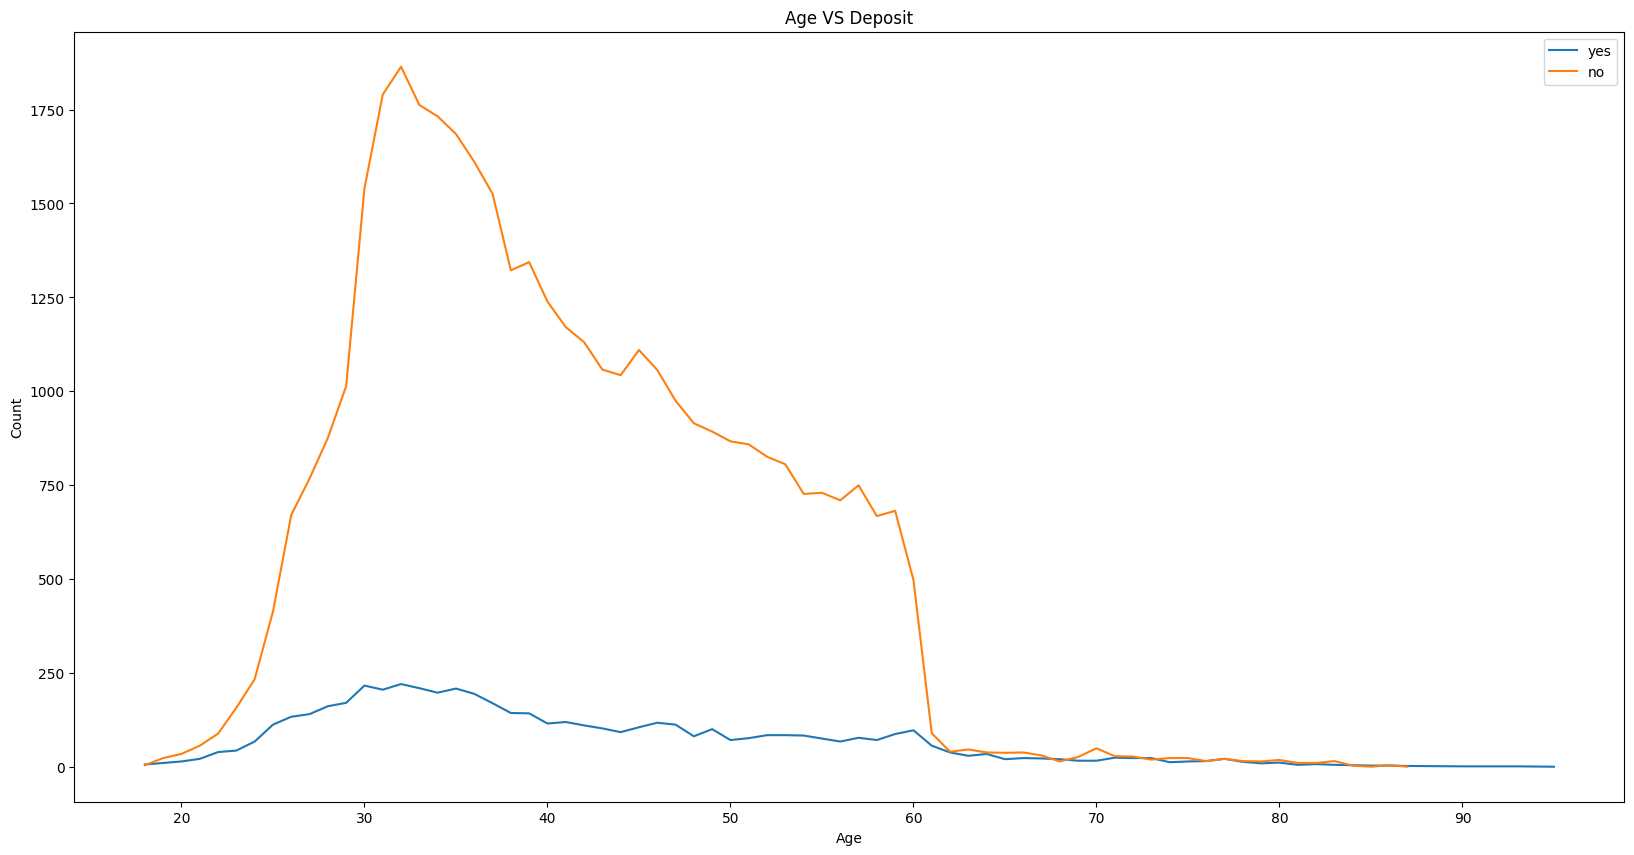

In [125]:
import pandas as pd
import matplotlib.pyplot as plt


agetodeposit = pd.DataFrame()
agetodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['age'].value_counts()
agetodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['age'].value_counts()

# Plotting the line plot
agetodeposit.sort_index().plot(kind='line', title="Age VS Deposit", figsize=(20, 10))
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [179]:
print(newdataframe.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposited?'],
      dtype='object')


In [183]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,-1,0,unknown,0
3,4,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,-1,0,unknown,0
4,5,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,4,-1,0,unknown,0


In [186]:
# Check unique values in the 'deposited?' column
print(newdataframe['deposited?'].unique())

# Check for any missing values in the 'job' and 'deposited?' columns
print(newdataframe[['job', 'deposited?']].isna().sum())


[0 1]
job           0
deposited?    0
dtype: int64


<Axes: title={'center': 'Loan VS Deposit'}, xlabel='loan'>

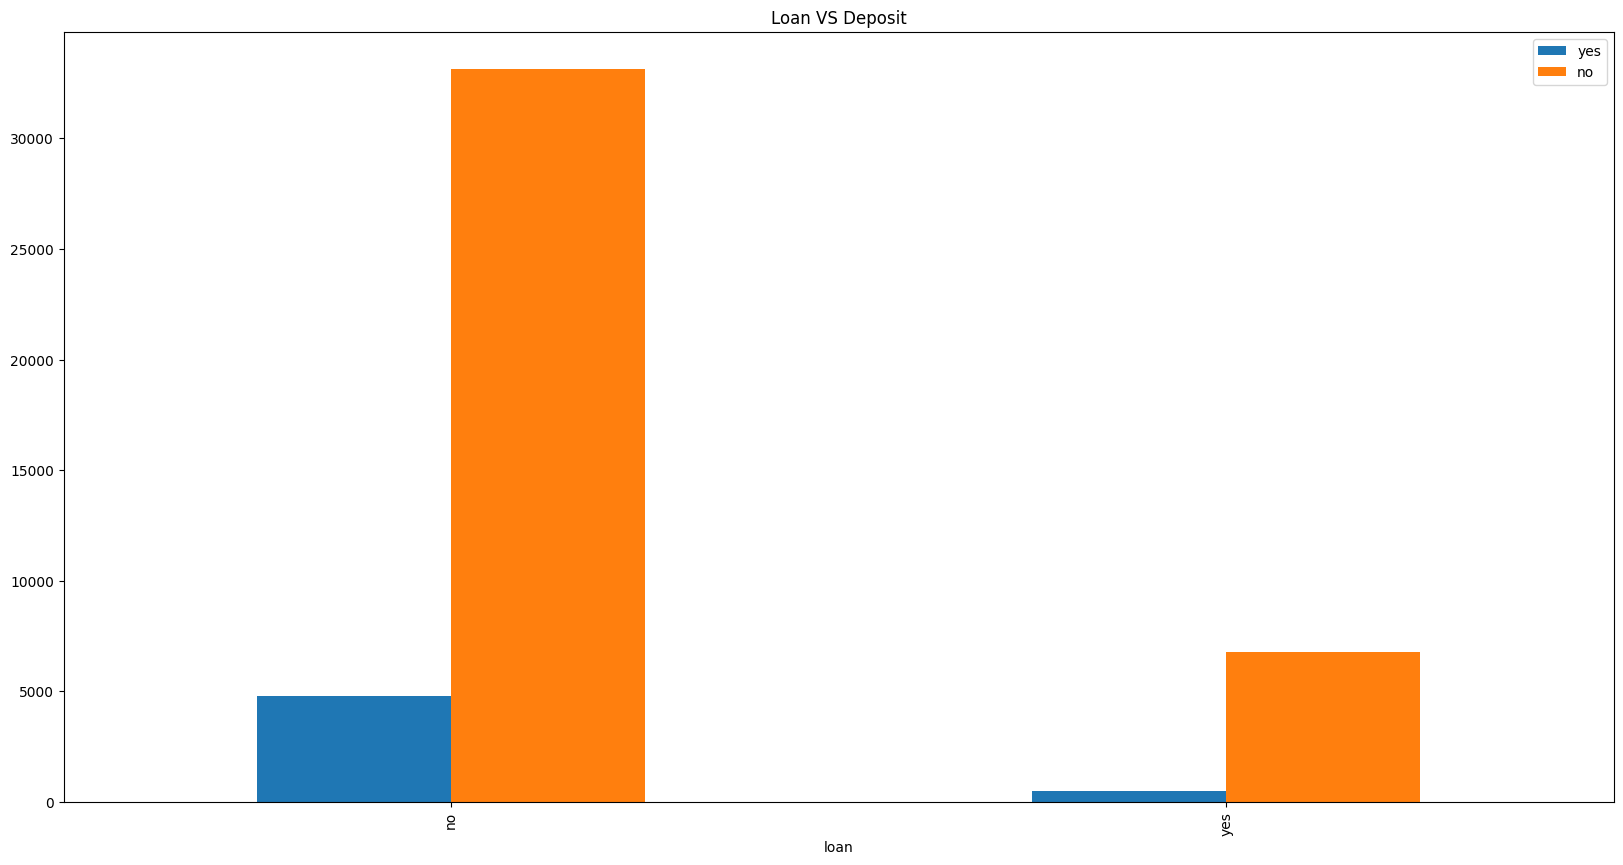

In [123]:
loantodeposit = pd.DataFrame()

loantodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['loan'].value_counts()
loantodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['loan'].value_counts()

loantodeposit.sort_index().plot.bar(title = "Loan VS Deposit", figsize=(20,10))

<Axes: title={'center': 'Job VS Deposit'}, xlabel='job'>

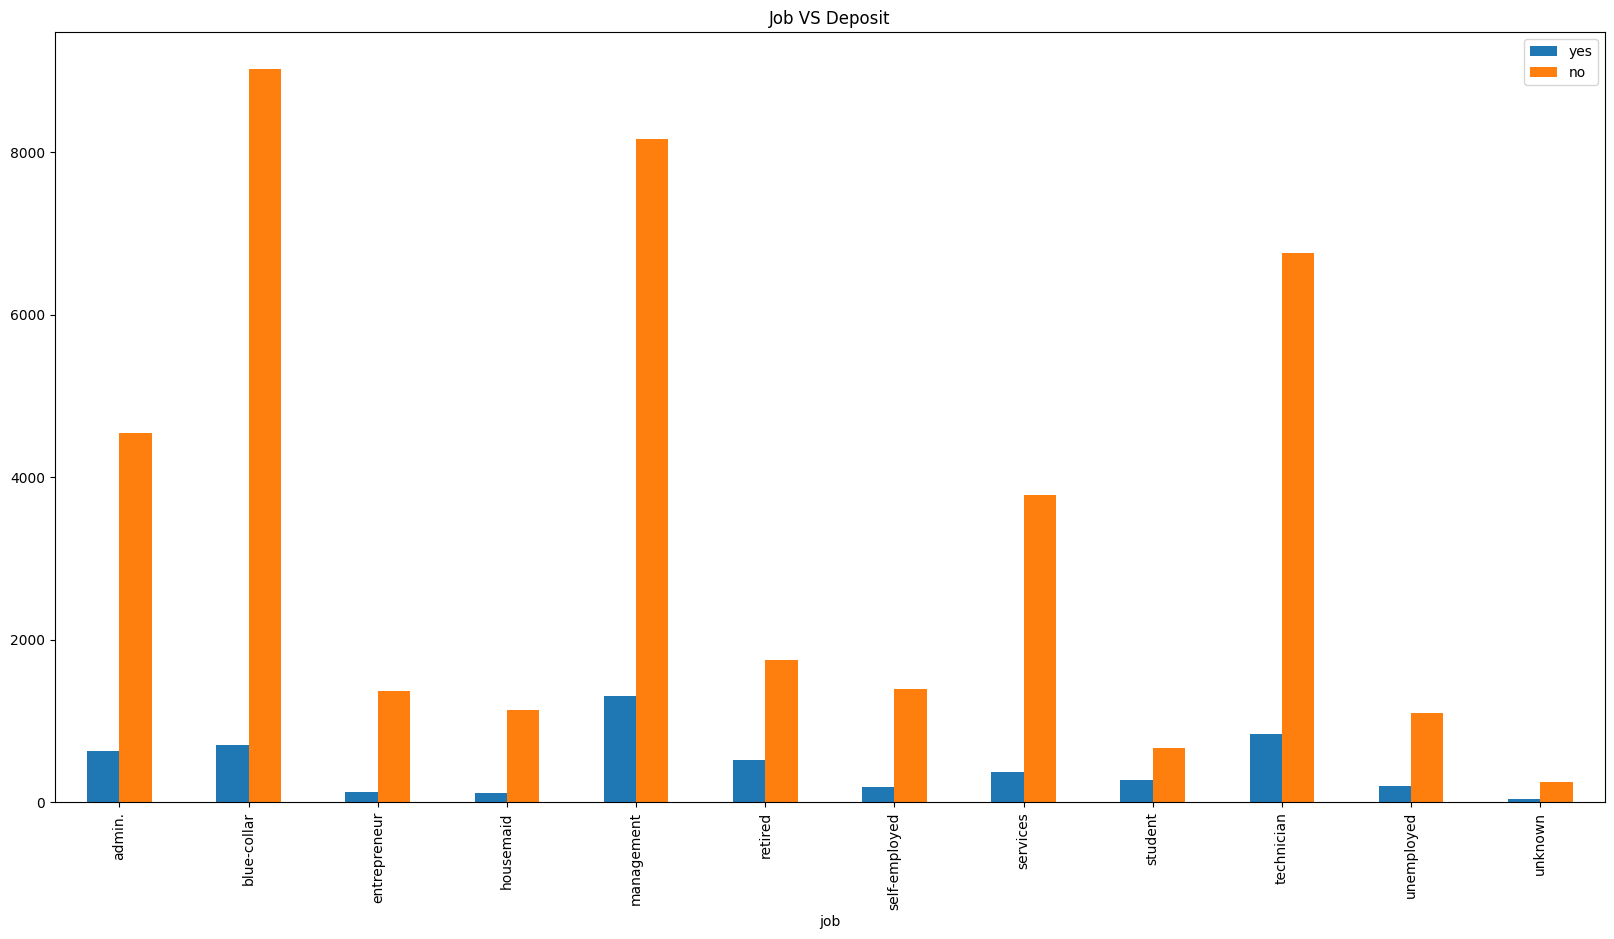

In [117]:
jobtodeposit = pd.DataFrame()

jobtodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['job'].value_counts()
jobtodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['job'].value_counts()

jobtodeposit.sort_index().plot.bar(title = "Job VS Deposit", figsize=(20,10))

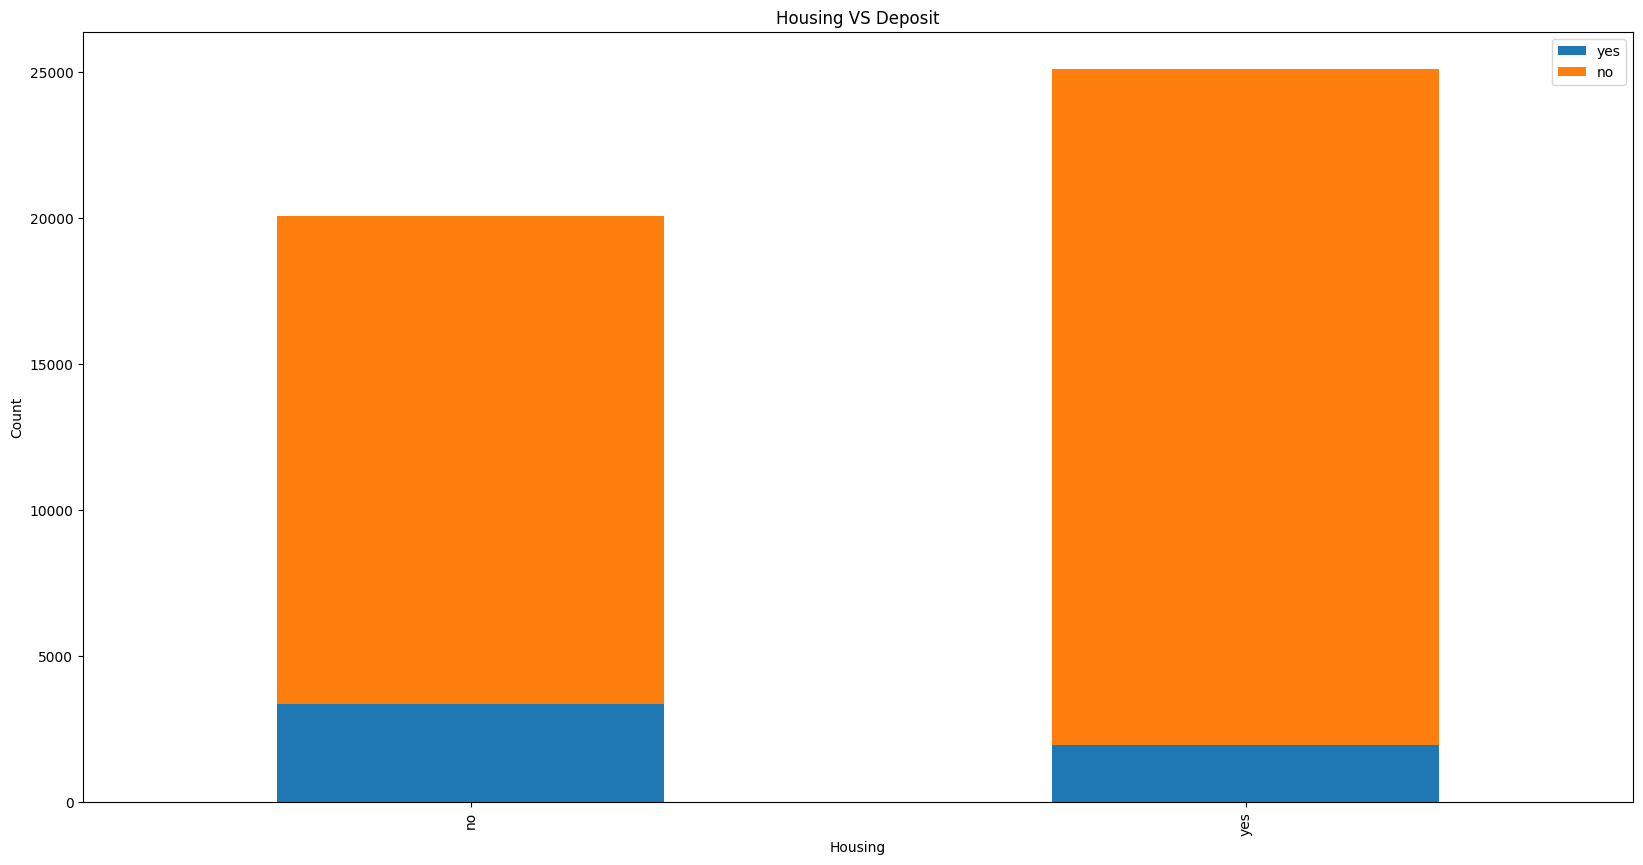

In [126]:
import pandas as pd
import matplotlib.pyplot as plt


housingtodeposit = pd.DataFrame()
housingtodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['housing'].value_counts()
housingtodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['housing'].value_counts()

# Plotting the stacked bar chart
housingtodeposit.sort_index().plot(kind='bar', stacked=True, title="Housing VS Deposit", figsize=(20, 10))
plt.xlabel("Housing")
plt.ylabel("Count")
plt.show()


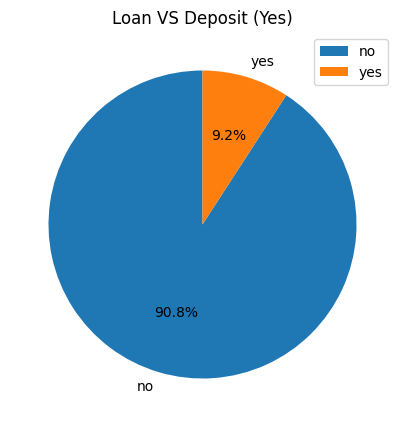

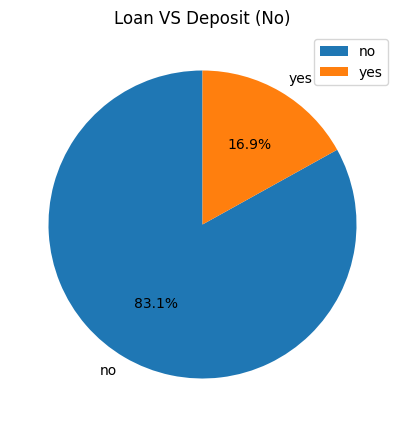

In [124]:
import pandas as pd
import matplotlib.pyplot as plt


loantodeposit = pd.DataFrame()
loantodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['loan'].value_counts()
loantodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['loan'].value_counts()

plt.figure(figsize=(20, 10))

# Plotting the pie chart
loantodeposit['yes'].plot.pie(autopct='%1.1f%%', startangle=90, title='Loan VS Deposit (Yes)', figsize=(10, 5), legend=True)
plt.ylabel('')  # Hide y-label
plt.show()

plt.figure(figsize=(20, 10))
loantodeposit['no'].plot.pie(autopct='%1.1f%%', startangle=90, title='Loan VS Deposit (No)', figsize=(10, 5), legend=True)
plt.ylabel('')  # Hide y-label
plt.show()


In [128]:
old_age = newdataframe[newdataframe['age'] > 61]

In [129]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [130]:
old_age[old_age['y'] == 'yes']

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29464,29465,68,retired,divorced,primary,no,250,no,no,cellular,3,feb,360,1,-1,0,unknown,yes
29865,29866,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
29961,29962,69,retired,married,primary,no,324,no,no,cellular,4,feb,136,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [131]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


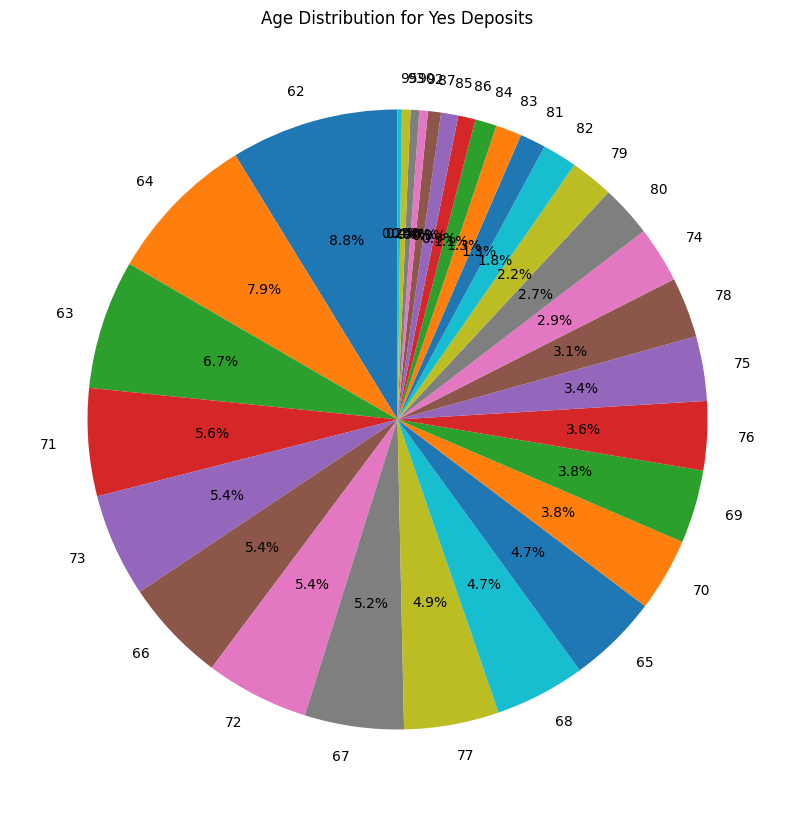

In [139]:
import matplotlib.pyplot as plt

# Filter the data
yes_old_age = old_age[old_age['y'] == 'yes']

# Plotting the pie chart
yes_old_age['age'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 20))
plt.title('Age Distribution for Yes Deposits')
plt.ylabel('')  # Hide y-label
plt.show()


In [132]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [143]:
newdataframe.rename(columns = {'y':'deposited?'}, inplace = True)

In [146]:
newdataframe['default'] = newdataframe['default'].replace({'yes': 1, 'no': 0})

In [147]:
newdataframe['deposited?'] = newdataframe['deposited?'].replace({'yes': 1, 'no': 0})

In [148]:
newdataframe['housing'] = newdataframe['housing'].replace({'yes': 1, 'no': 0})

In [149]:
newdataframe['loan'] = newdataframe['loan'].replace({'yes': 1, 'no': 0})

In [150]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [151]:
newdataframe.dtypes

sl. no         int64
age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposited?     int64
dtype: object

In [155]:
newdataframe['default'] = newdataframe['default'].astype('Int64')

In [156]:
newdataframe['housing'] = newdataframe['housing'].astype('Int64')

In [157]:
newdataframe['loan'] = newdataframe['loan'].astype('Int64')

In [158]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


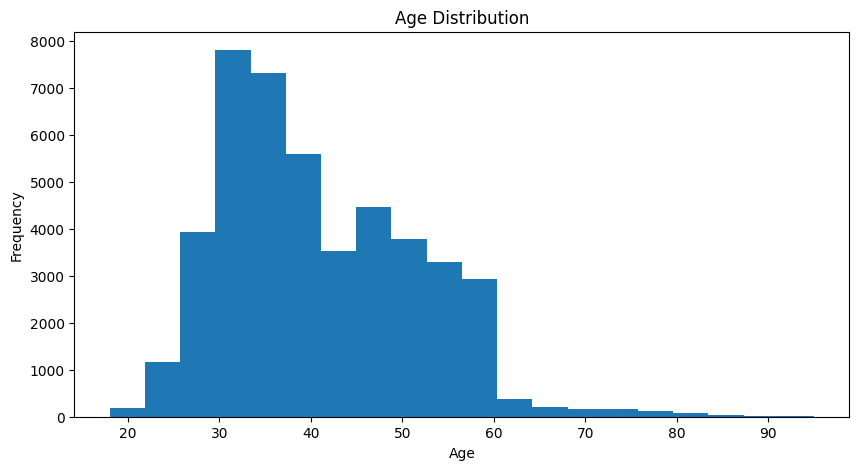

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

newdataframe['age'].plot(kind='hist', bins=20, title='Age Distribution', figsize=(10, 5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [162]:
newdataframe.drop('duration', axis='columns', inplace = True)

KeyError: "['duration'] not found in axis"

In [163]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,-1,0,unknown,0
3,4,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,1,-1,0,unknown,0
4,5,33,unknown,single,unknown,0,1,0,0,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,4,-1,0,unknown,0


In [164]:
newdataframe.isnull().sum()

sl. no        0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
deposited?    0
dtype: int64

In [165]:
newdataframe.shape

(45211, 17)

In [168]:
newdataframe['default'].fillna(0,inplace = True)
newdataframe['housing'].fillna(0,inplace = True)
newdataframe['loan'].fillna(0,inplace = True)

In [169]:
newdataframe.isnull().sum()

sl. no        0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
deposited?    0
dtype: int64

In [173]:
newdataframe.dropna(inplace=True)